In [1]:
import json
import pandas as pd

hypersim_file = "./hypersim_splits_original.csv"

original_splits = pd.read_csv(hypersim_file)

In [27]:
ok_frames = original_splits[original_splits["included_in_public_release"]]
ok_frames = ok_frames.drop(
    columns=["included_in_public_release", "exclude_reason"]
)

train_frames = ok_frames[ok_frames['split_partition_name'] == 'train'].drop(columns=['split_partition_name'])
val_frames = ok_frames[ok_frames['split_partition_name'] == 'val'].drop(columns=['split_partition_name'])
test_frames = ok_frames[ok_frames['split_partition_name'] == 'test'].drop(columns=['split_partition_name'])

In [33]:
json_dict = {'train': train_frames.to_dict(orient='split')['data'],
             'validation':val_frames.to_dict(orient='split')['data'],
             'test':test_frames.to_dict(orient='split')['data']}

In [35]:
with open("hypersim_splits.json", 'x') as handler:
    json.dump(json_dict,handler)
    

# Dataset EDA

<KeysViewHDF5 ['dataset']>

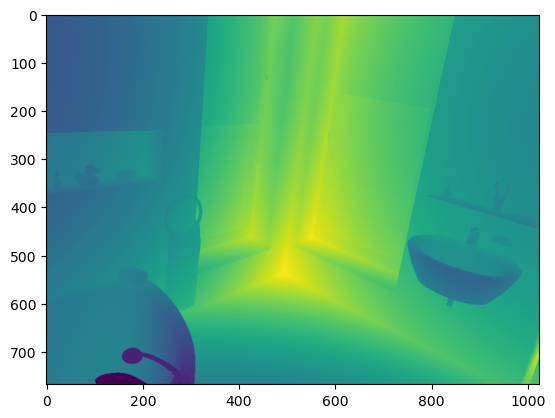

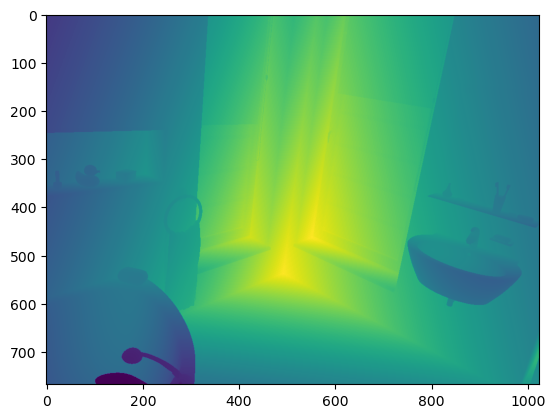

(768, 1024)


(768, 1024, 3)

<HDF5 dataset "dataset": shape (768, 1024), type "<i2">


In [48]:
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

filename = "/hadatasets/hypersim/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.depth_meters.hdf5"
with h5py.File(filename) as f:
    display(f.keys())
    distance = f["dataset"][()].astype(np.float32)
    plt.cla()
    plt.imshow(distance)
    plt.show()

    intWidth = 1024
    intHeight = 768
    fltFocal = 886.81
    npyDistance = distance

    numpy = np

    npyImageplaneX = (
        numpy.linspace(
            (-0.5 * intWidth) + 0.5, (0.5 * intWidth) - 0.5, intWidth
        )
        .reshape(1, intWidth)
        .repeat(intHeight, 0)
        .astype(numpy.float32)[:, :, None]
    )
    npyImageplaneY = (
        numpy.linspace(
            (-0.5 * intHeight) + 0.5, (0.5 * intHeight) - 0.5, intHeight
        )
        .reshape(intHeight, 1)
        .repeat(intWidth, 1)
        .astype(numpy.float32)[:, :, None]
    )
    npyImageplaneZ = numpy.full(
        [intHeight, intWidth, 1], fltFocal, numpy.float32
    )
    npyImageplane = numpy.concatenate(
        [npyImageplaneX, npyImageplaneY, npyImageplaneZ], 2
    )

    npyDepth = npyDistance / numpy.linalg.norm(npyImageplane, 2, 2) * fltFocal

    plt.imshow(npyDepth)
    plt.show()
    print(npyDepth.shape)


filename = "/hadatasets/hypersim/ai_001_001/images/scene_cam_00_final_preview/frame.0001.color.jpg"
img = Image.open(filename)
display(np.array(img).shape)

filename = "/hadatasets/hypersim/ai_001_001/images/scene_cam_00_geometry_hdf5/frame.0001.semantic.hdf5"
with h5py.File(filename) as f:
    print(f['dataset'])
